In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
import seaborn as sns

# 1. Load Dataset

In [ ]:
# 1. Load Dataset
file_path = '/content/ev_data_normalized (2).csv'  # Update to the correct file path
data = pd.read_csv(file_path)

# 2. Preprocessing


# Handle missing values


In [ ]:
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:  # Numerical columns
        data[col] = data[col].fillna(data[col].mean())  # Reassign filled column
    else:  # Categorical columns (if any exist)
        data[col] = data[col].fillna("Unknown")  # Reassign filled column

# Select features and target

In [ ]:
features = ['Electric Range', 'Base MSRP', 'Model Year']  # Enhanced feature set
target = 'Electric Vehicle Type'

X = data[features]
y = data[target]

# Split data into train and test sets

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train SVM Classifier with sigmoid Kernel

In [ ]:
# 3. Train SVM Classifier with RBF Kernel
svm_classifier = SVC(kernel='sigmoid', C=1.0, gamma=0.1, class_weight='balanced', random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(class_weight='balanced', gamma=0.1, kernel='poly', random_state=42)

# 4. Evaluate the Model

In [ ]:
# 4. Evaluate the Model
y_pred = svm_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, output_dict=True))

Classification Report:
{'0': {'precision': 0.8648090815273478, 'recall': 0.9116586417390253, 'f1-score': 0.8876160960348362, 'support': 49637.0}, '1': {'precision': 0.5911040656471466, 'recall': 0.4726012077834936, 'f1-score': 0.525251688279405, 'support': 13413.0}, 'accuracy': 0.8182553528945281, 'macro avg': {'precision': 0.7279565735872472, 'recall': 0.6921299247612595, 'f1-score': 0.7064338921571206, 'support': 63050.0}, 'weighted avg': {'precision': 0.8065821921062354, 'recall': 0.8182553528945281, 'f1-score': 0.8105281689733993, 'support': 63050.0}}


# Confusion Matrix Visualization

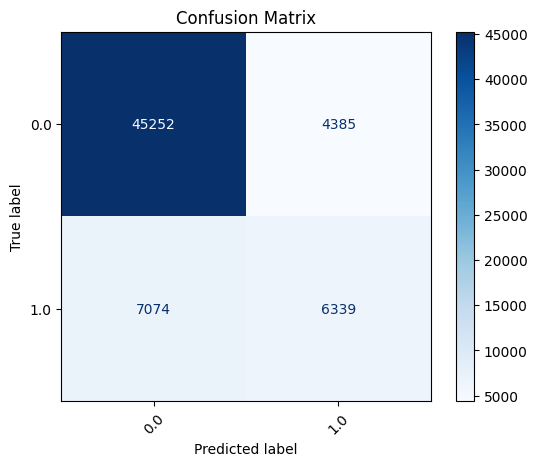

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Battery Electric Vehicle", "Plug-in Hybrid Electric Vehicle"])
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()